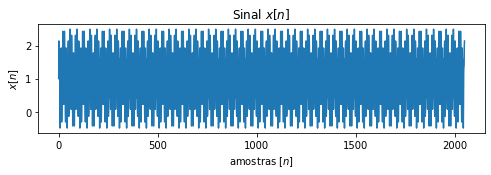

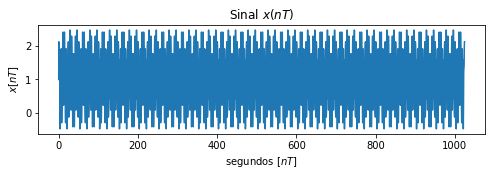

In [39]:
#importa as bibliotecas
import numpy as np, scipy as sp, matplotlib.pyplot as plt

#cria vetor tempo
N = 2050 #numero de amostras
T = 0.5 # periodo de amostragem
t0 = 0 # tempo inicial
t = np.linspace(t0, (N-1)*T, N) # vetor tempo (opcao 1)
t = np.arange(t0, N*T, T) # vetor tempo (opcao 2)

# criando o vetor SINAL
x = np.sin(0.44*np.pi*t) + 0.5*np.sin(np.pi*t) + 1

# grafico do sinal
plt.figure(figsize=(8,2))
plt.plot(x);
plt.title("Sinal $x[n]$")
plt.xlabel("amostras [$n$]")
plt.ylabel("$x[n]$")

plt.figure(figsize=(8,2))
plt.plot(t, x);
plt.title("Sinal $x(nT)$")
plt.xlabel("segundos [$nT$]")
plt.ylabel("$x[nT]$");

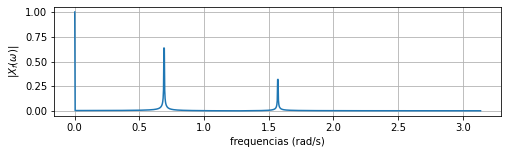

In [42]:
# Fazer a FFT (Fast Fourier Transform) do sinal
from scipy.fft import fft

X_f = fft(x)
X_f = X_f/N # corrige amplitude do sinal
X_f = X_f[:N//2]
X_f[1:] = 2*X_f[1:]
# f0 = 1/(N*T) #freq em Hz
# fHz = np.arange(N)*f0 #freq em Hz
# fHz = fHz[:N//2]
# w0 = 2*np.pi/(N*T) #freq em rad/s
# wRad = np.arange(N)*w0 #freq em rad/s
w0 = 2*np.pi/(N) #freq em rad/amostra
wRad = np.arange(N)*w0 #freq em rad/amostra
wRad = wRad[:N//2]


plt.figure(figsize=(8,2))
plt.plot(wRad, np.abs(X_f)) #modulo
plt.xlabel("frequencias (rad/s)")
plt.ylabel("$|X_f(\omega)|$")
plt.grid(1);

In [41]:
.44*np.pi

1.382300767579509